In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

""" 
Check Corrolation between all data columns.
It seems smoker and expenses have a quite strong corrolation with 0.787251.
This means that the expenses are affected by being a smoker.
"""

df = pd.read_csv("data/insurance.csv")
df['smoker']=df['smoker'].astype('category').cat.codes
df['sex']=df['sex'].astype('category').cat.codes
df['region']=df['region'].astype('category').cat.codes
df.corr().round(2)

,age,sex,bmi,children,smoker,region,expenses
age,1.00,-0.02,0.11,0.04,-0.03,0.00,0.30
sex,-0.02,1.00,0.05,0.02,0.08,0.00,0.06
bmi,0.11,0.05,1.00,0.01,0.00,0.16,0.20
children,0.04,0.02,0.01,1.00,0.01,0.02,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,-0.00,0.79
region,0.00,0.00,0.16,0.02,-0.00,1.00,-0.01
expenses,0.30,0.06,0.20,0.07,0.79,-0.01,1.00


<AxesSubplot:ylabel='Frequency'>

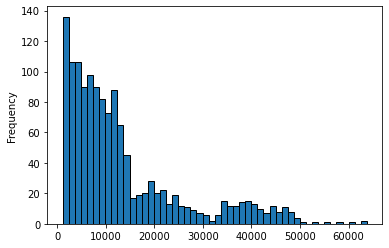

In [10]:
df['expenses'].plot.hist(bins=50,ec='black')

<AxesSubplot:title={'center':'expenses'}, xlabel='[age]'>

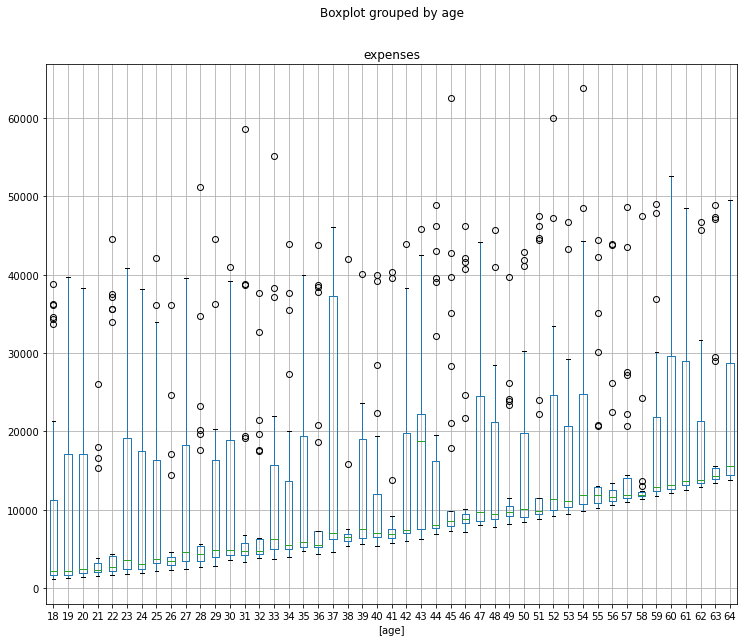

In [15]:
#df[['age','expenses']].plot.scatter('age','expenses')
df[['age','expenses']].boxplot(by='age',figsize=(12,10)
                               
#Age impacts expenses 

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

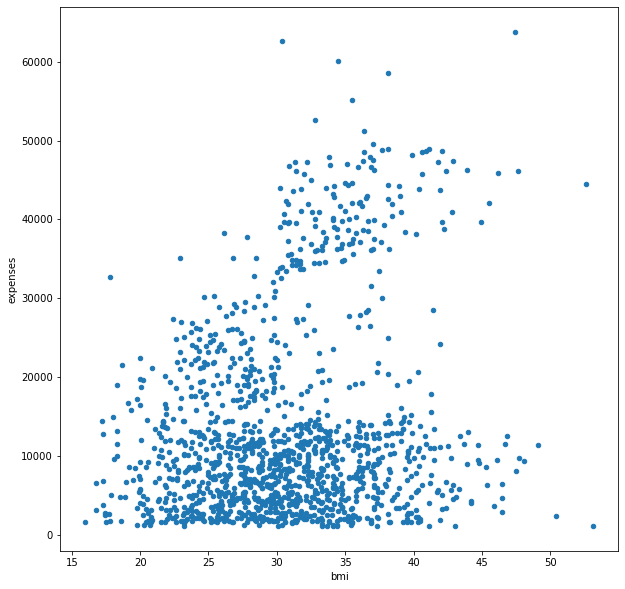

In [40]:
df[['bmi','expenses']].plot.scatter('bmi','expenses',figsize=(10,10))

#BMI has some impact on expenses

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

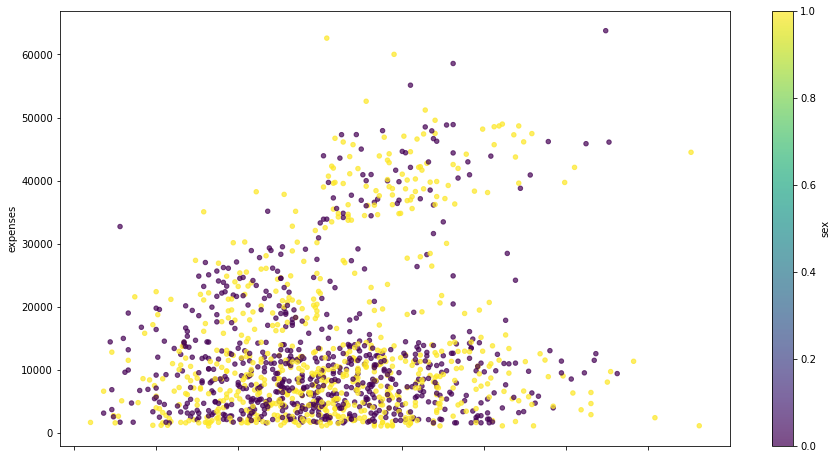

In [25]:
df[['bmi','expenses','sex']].plot.scatter('bmi','expenses',c='sex',cmap='viridis',alpha=0.7,figsize=(15,8))
#Sex 1 more suseptible to becoming ill than sex 0 when BMI is higher ~ more yellow dots higher on plot

#Sex 1 seems to have higher probability of having higher expenses when combined with a higher BMI

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

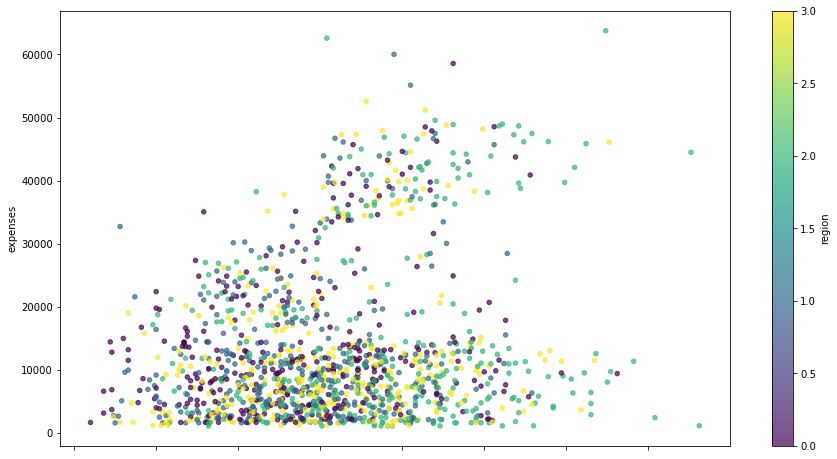

In [26]:
df[['bmi','expenses','region']].plot.scatter('bmi','expenses',c='region',cmap='viridis',alpha=0.7,figsize=(15,8))
#Sex 1 more suseptible to becoming ill than sex 0 when BMI is higher ~ more yellow dots higher on plot
#There seems to be little effect of regions on expenses when considering BMI

<AxesSubplot:title={'center':'expenses'}, xlabel='[smoker]'>

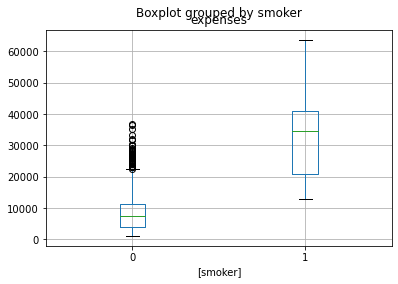

In [4]:
df[['smoker','expenses']].boxplot(by='smoker')
#The distribution of expenses is clearly skewed higher for smokers

<AxesSubplot:title={'center':'expenses'}, xlabel='[children]'>

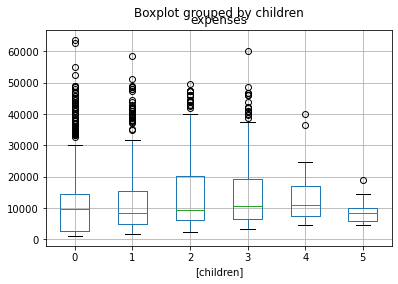

In [7]:
df[['children','expenses']].boxplot(by='children')
#The number of children does not seem to have much affect on expenses

#Group by number of children, count the number of entries for each group, plot that number vs each group

<AxesSubplot:title={'center':'expenses'}, xlabel='[sex, children]'>

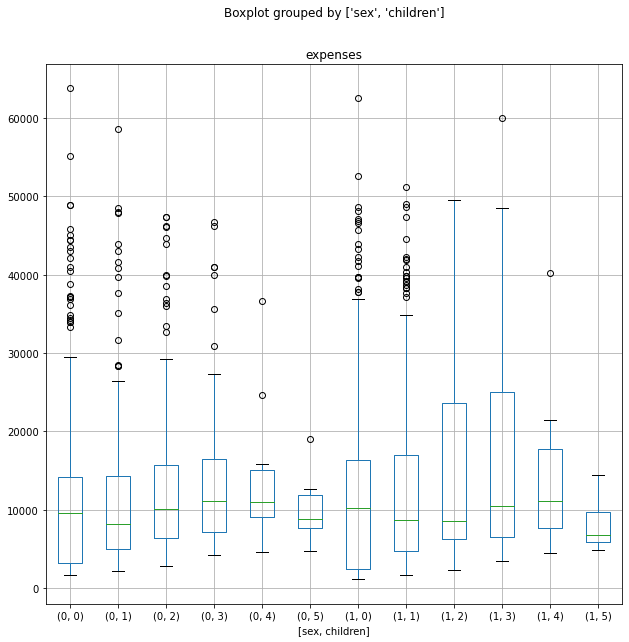

In [38]:
df[['children','expenses','sex']].boxplot(column=['expenses'],by=['sex','children'],figsize=(10,10))
#Add colour for different sexes

#This plot is an indication that no matter your sex, your number of children does not seem to 
#impact your expenses for 0 & 1 children

#Children impacts your expenses depending on sex if you have more than 1 child

<AxesSubplot:title={'center':'expenses'}, xlabel='[sex]'>

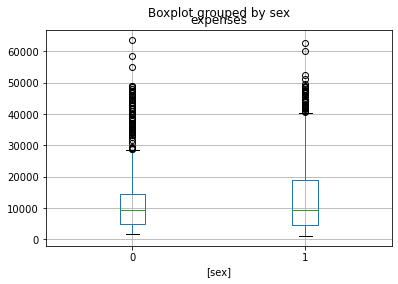

In [5]:
df[['sex','expenses']].boxplot(by='sex')

<AxesSubplot:title={'center':'expenses'}, xlabel='[region]'>

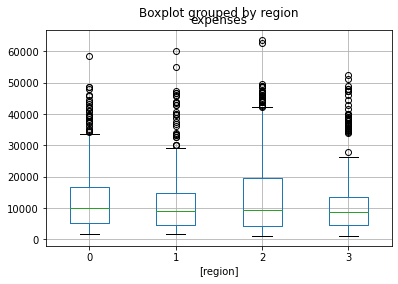

In [6]:
df[['region','expenses']].boxplot(by='region')

In [41]:
#To tell if there is a difference between these different distributions e.g. all 4 region distributions, I wouldn't need to do 2 statistical tests. 
# 1. A t-test which tells you if there is a significant difference in means between 2 groups
# 2. A f-test which would tell you7 if there is a significant differencce in variance between the 2 groups
# If both(And only both) tests pass, they are statistically the same.If not, they aren't the same.

In [22]:
#No missing Data ( All have 1338 ) 
print(df.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.665471     1.094918     0.204783   
std      14.049960     0.500160     6.098382     1.205493     0.403694   
min      18.000000     0.000000    16.000000     0.000000     0.000000   
25%      27.000000     0.000000    26.300000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.100000     5.000000     1.000000   

            region      expenses  
count  1338.000000   1338.000000  
mean      1.515695  13270.422414  
std       1.104885  12110.011240  
min       0.000000   1121.870000  
25%       1.000000   4740.287500  
50%       2.000000   9382.030000  
75%       2.000000  16639.915000  
max       3.000000  63770.430000  


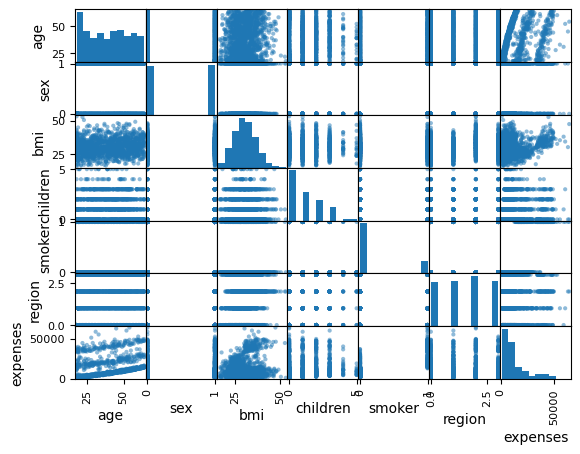

In [24]:
scatter_matrix(df)
plt.show()

In [60]:
X = df.drop('expenses', axis='columns')
X = df[['smoker','age']]
X = pd.get_dummies(X)
y = df.expenses



if(df['sex'] == 0):
    listA.append[df['sex']]
    listB.append[df['children']]+ 

print(listA)  



# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

# print('intercept:', model.intercept_)
# print('slopes:', model.coef_)
print('R squared:', model.score(X,y))

yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

R squared: 0.7212769856997658
RMSE 6442.253542088551


<AxesSubplot:xlabel='target', ylabel='predictions'>

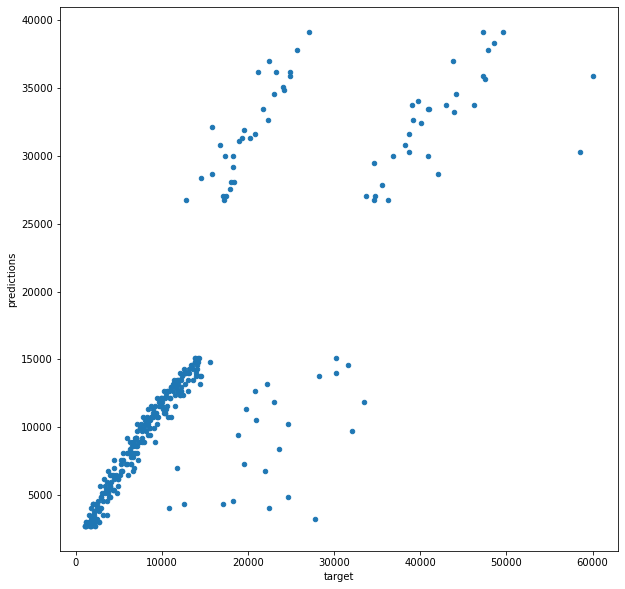

In [58]:
X_test['predictions']=yhat
X_test['target']=y_test
X_test[['target','predictions']].plot.scatter('target','predictions',figsize=(10,10))